In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as skl
import scipy.stats as scp
%matplotlib inline

In [2]:
raw_results=pd.read_csv("MMPBSA_results_amber.csv")

In [3]:
raw_results

,Ligand,Pred. dG (kcal/mol),Exp. dG (kcal/mol),Std. error of mean (kcal/mol),Estimated experimental error (kcal/mol)
0,ejm_31,-11.9983,-9.54,0.1394,0.64
1,ejm_42,-9.9951,-9.78,0.1111,0.64
2,ejm_43,-12.3635,-8.26,0.1449,0.64
3,ejm_44,-13.7724,-7.42,0.1184,0.64
4,ejm_45,-12.4941,-9.56,0.1315,0.64
5,ejm_46,-13.0232,-11.31,0.1324,0.64
6,ejm_47,-13.1228,-9.70,0.1236,0.64
7,ejm_48,-17.0168,-9.00,0.1254,0.64
8,ejm_49,-13.2963,-7.75,0.1261,0.64
9,ejm_50,-15.1528,-8.98,0.1545,0.64


<AxesSubplot:xlabel='Exp. dG (kcal/mol)', ylabel='Pred. dG (kcal/mol)'>

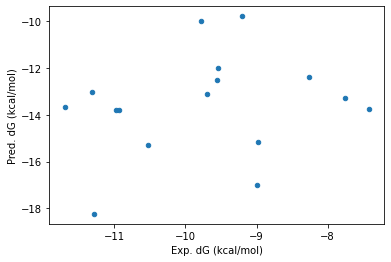

In [4]:
raw_results.plot.scatter(y="Pred. dG (kcal/mol)", x="Exp. dG (kcal/mol)")

In [5]:
pred_dg=raw_results["Pred. dG (kcal/mol)"].to_numpy()
exp_dg=raw_results["Exp. dG (kcal/mol)"].to_numpy()
err_pred=raw_results["Std. error of mean (kcal/mol)"].to_numpy()
err_exp=raw_results["Estimated experimental error (kcal/mol)"].to_numpy()

In [6]:
x_fill_05 = np.array([-20, -12, -4])
y1_fill_05 = np.array([-19.5, -11.5, -3.5])
y2_fill_05 = np.array([-20.5, -12.5, -4.5])
y1_fill_1 = np.array([-19, -11, -3])
y2_fill_1 = np.array([-21, -13, -5])

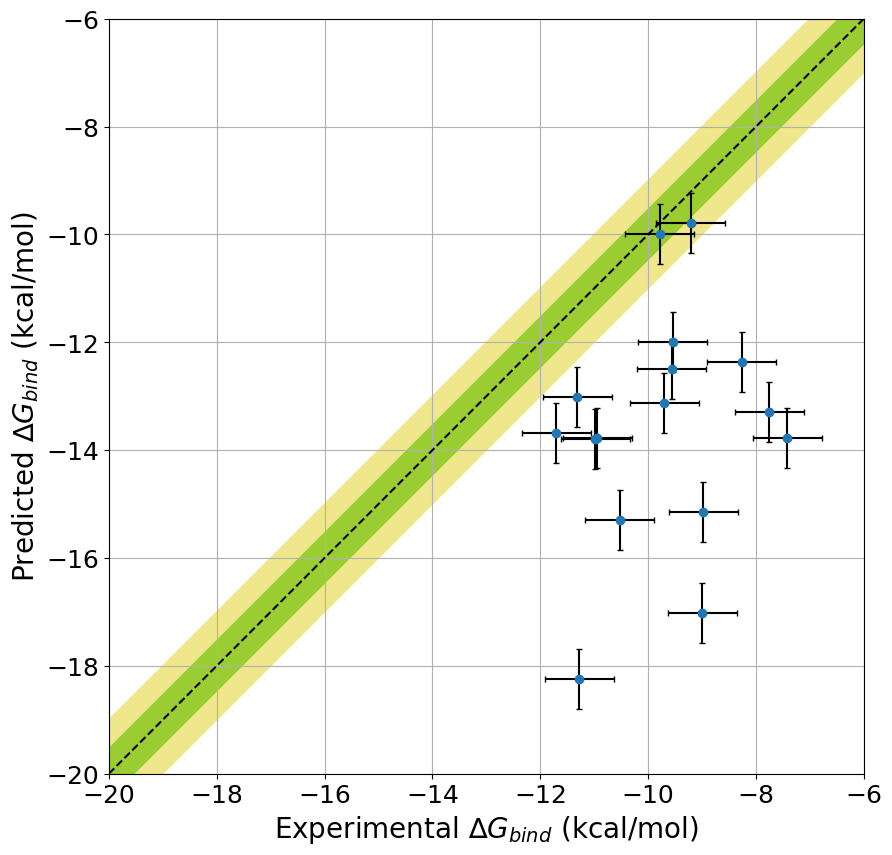

In [9]:
fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
#plt.scatter(exp_dg, pred_dg, s=0.5)
plt.errorbar(x=exp_dg, y=pred_dg, xerr=err_exp, yerr=0.556, fmt='o', ecolor='black', capsize=2)
plt.axis([-20, -6, -20, -6])
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1.5, scalex=False, scaley=False)
plt.grid()
plt.fill_between(x_fill_05, y1_fill_05, y2_fill_05, color="yellowgreen")
plt.fill_between(x_fill_05, y1_fill_05, y1_fill_1, color="khaki")
plt.fill_between(x_fill_05, y2_fill_05, y2_fill_1, color="khaki")
plt.gca().set_aspect("equal")
plt.xlabel('Experimental $∆G_{bind}$ (kcal/mol)', size=20)
plt.ylabel('Predicted $∆G_{bind}$ (kcal/mol)', size=20)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.savefig("MMPBSA_accuracy.png")
plt.show()

In [10]:
mue=skl.mean_absolute_error(exp_dg, pred_dg)
rmse=skl.mean_squared_error(exp_dg, pred_dg, squared=False)
tau= scp.kendalltau(exp_dg, pred_dg)
print('MAE:', mue)
print('RMSE:', rmse)
print('Kendall Tau:', tau[0])

MAE: 3.8026937500000004
RMSE: 4.407923514323382
Kendall Tau: 0.13333333333333333
